#### Build a model to detect credit card fraud
- Perform data cleaning
- Deal with missing and duplicate values if present
- Check Whether the classes are balanced or not
- Check the performance of models without dealing with imbalanced classes
- Explain the use of under-sampling and over-sampling for imbalanced classification
- Train the model using several classification models and find the best model after under-sampling the dataset
- Train the model using several classification models and find the best model after over-sampling the dataset
- Use hyperparameter tuning to find best parameters for the algorithm
- Evaluate the model using various classification evaluation metrics


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [106]:
data = pd.read_csv('creditcard.csv')

In [107]:
pd.set_option('display.max_columns', None)

In [108]:
data.head(50)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [110]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [111]:
data.duplicated().sum()

1081

In [112]:
data.drop_duplicates(inplace = True)

<AxesSubplot:xlabel='Class', ylabel='count'>

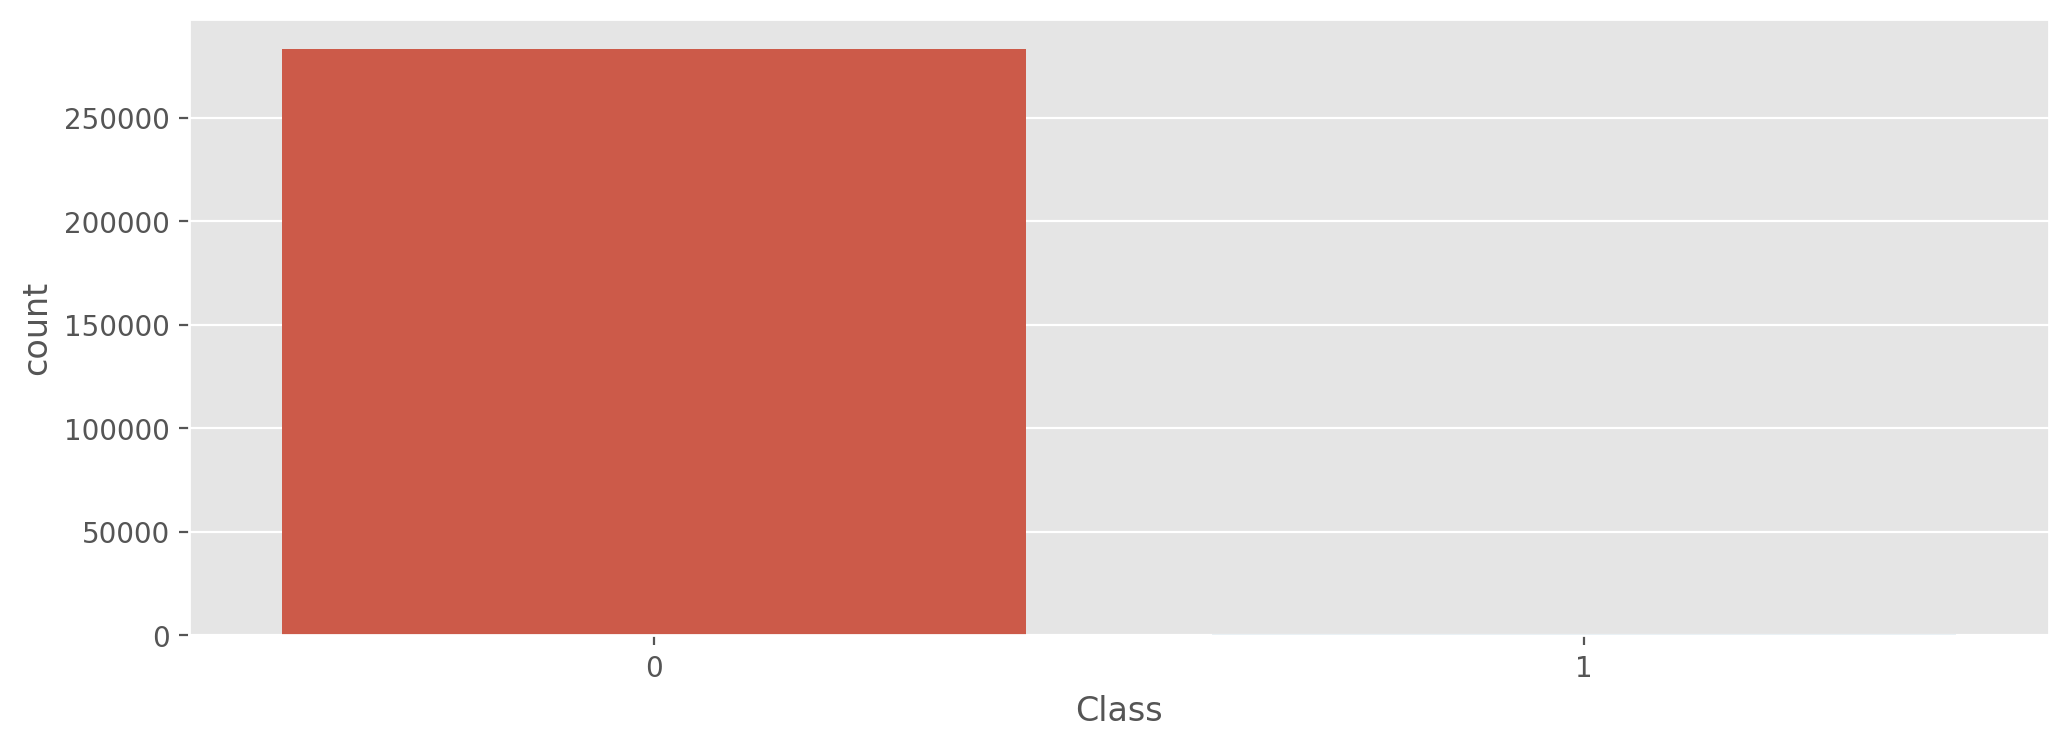

In [113]:
plt.figure(figsize = (12,4), dpi = 200)
sns.countplot(data['Class'])

In [114]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='Amount'>

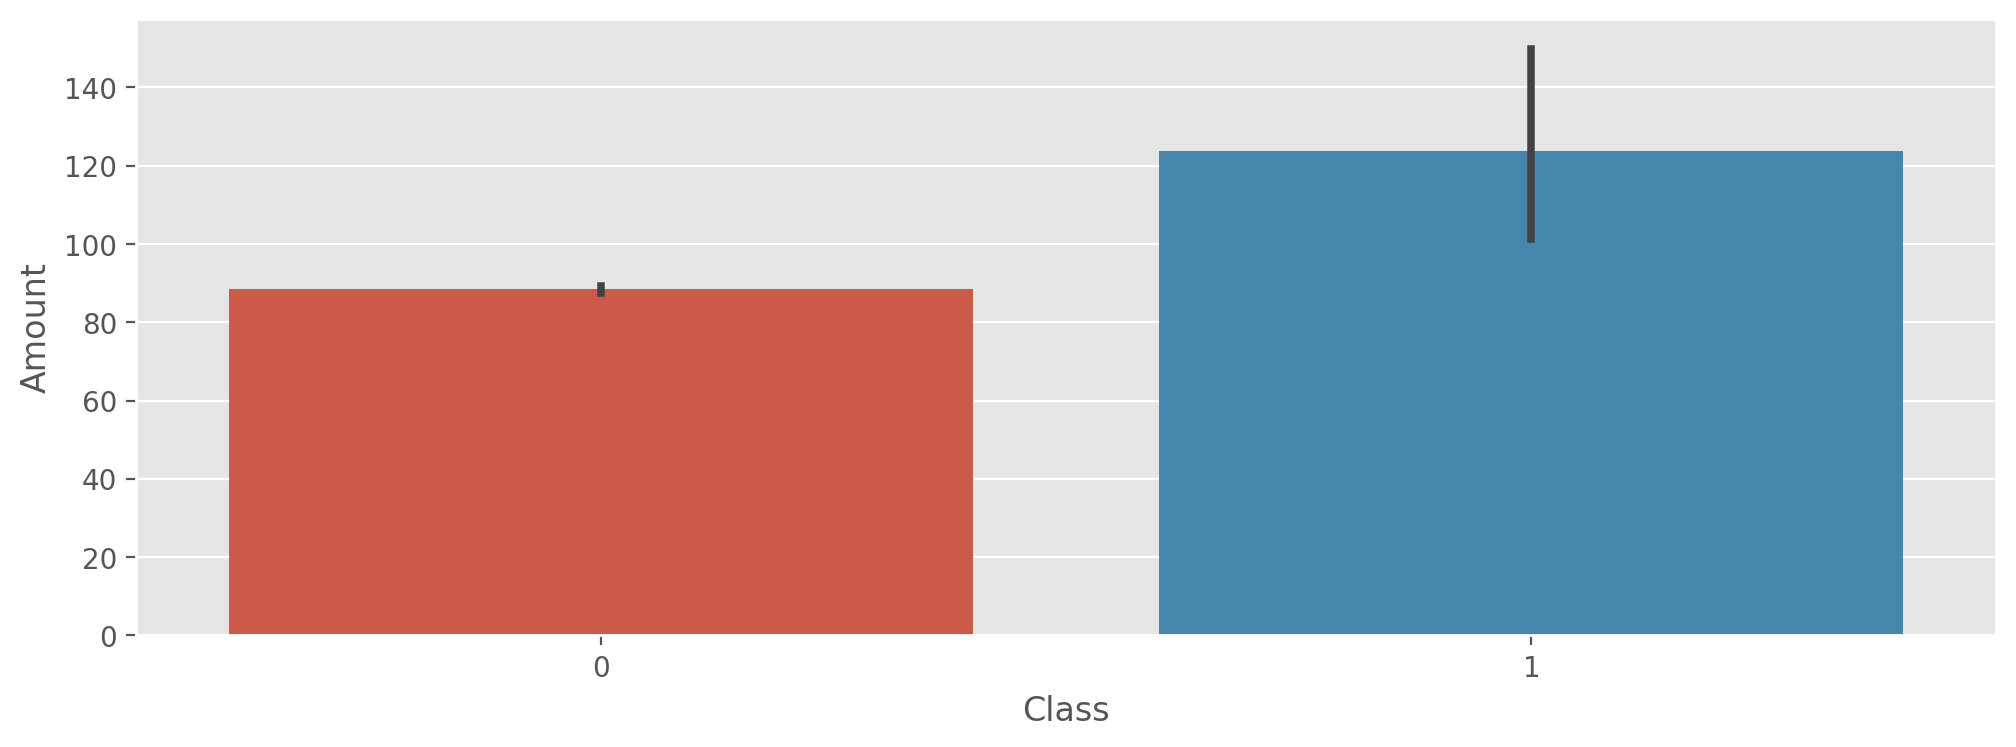

In [115]:
plt.figure(figsize = (12,4), dpi = 200)
sns.barplot(data['Class'], data['Amount'])

In [116]:
data['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 283726, dtype: float64

<AxesSubplot:>

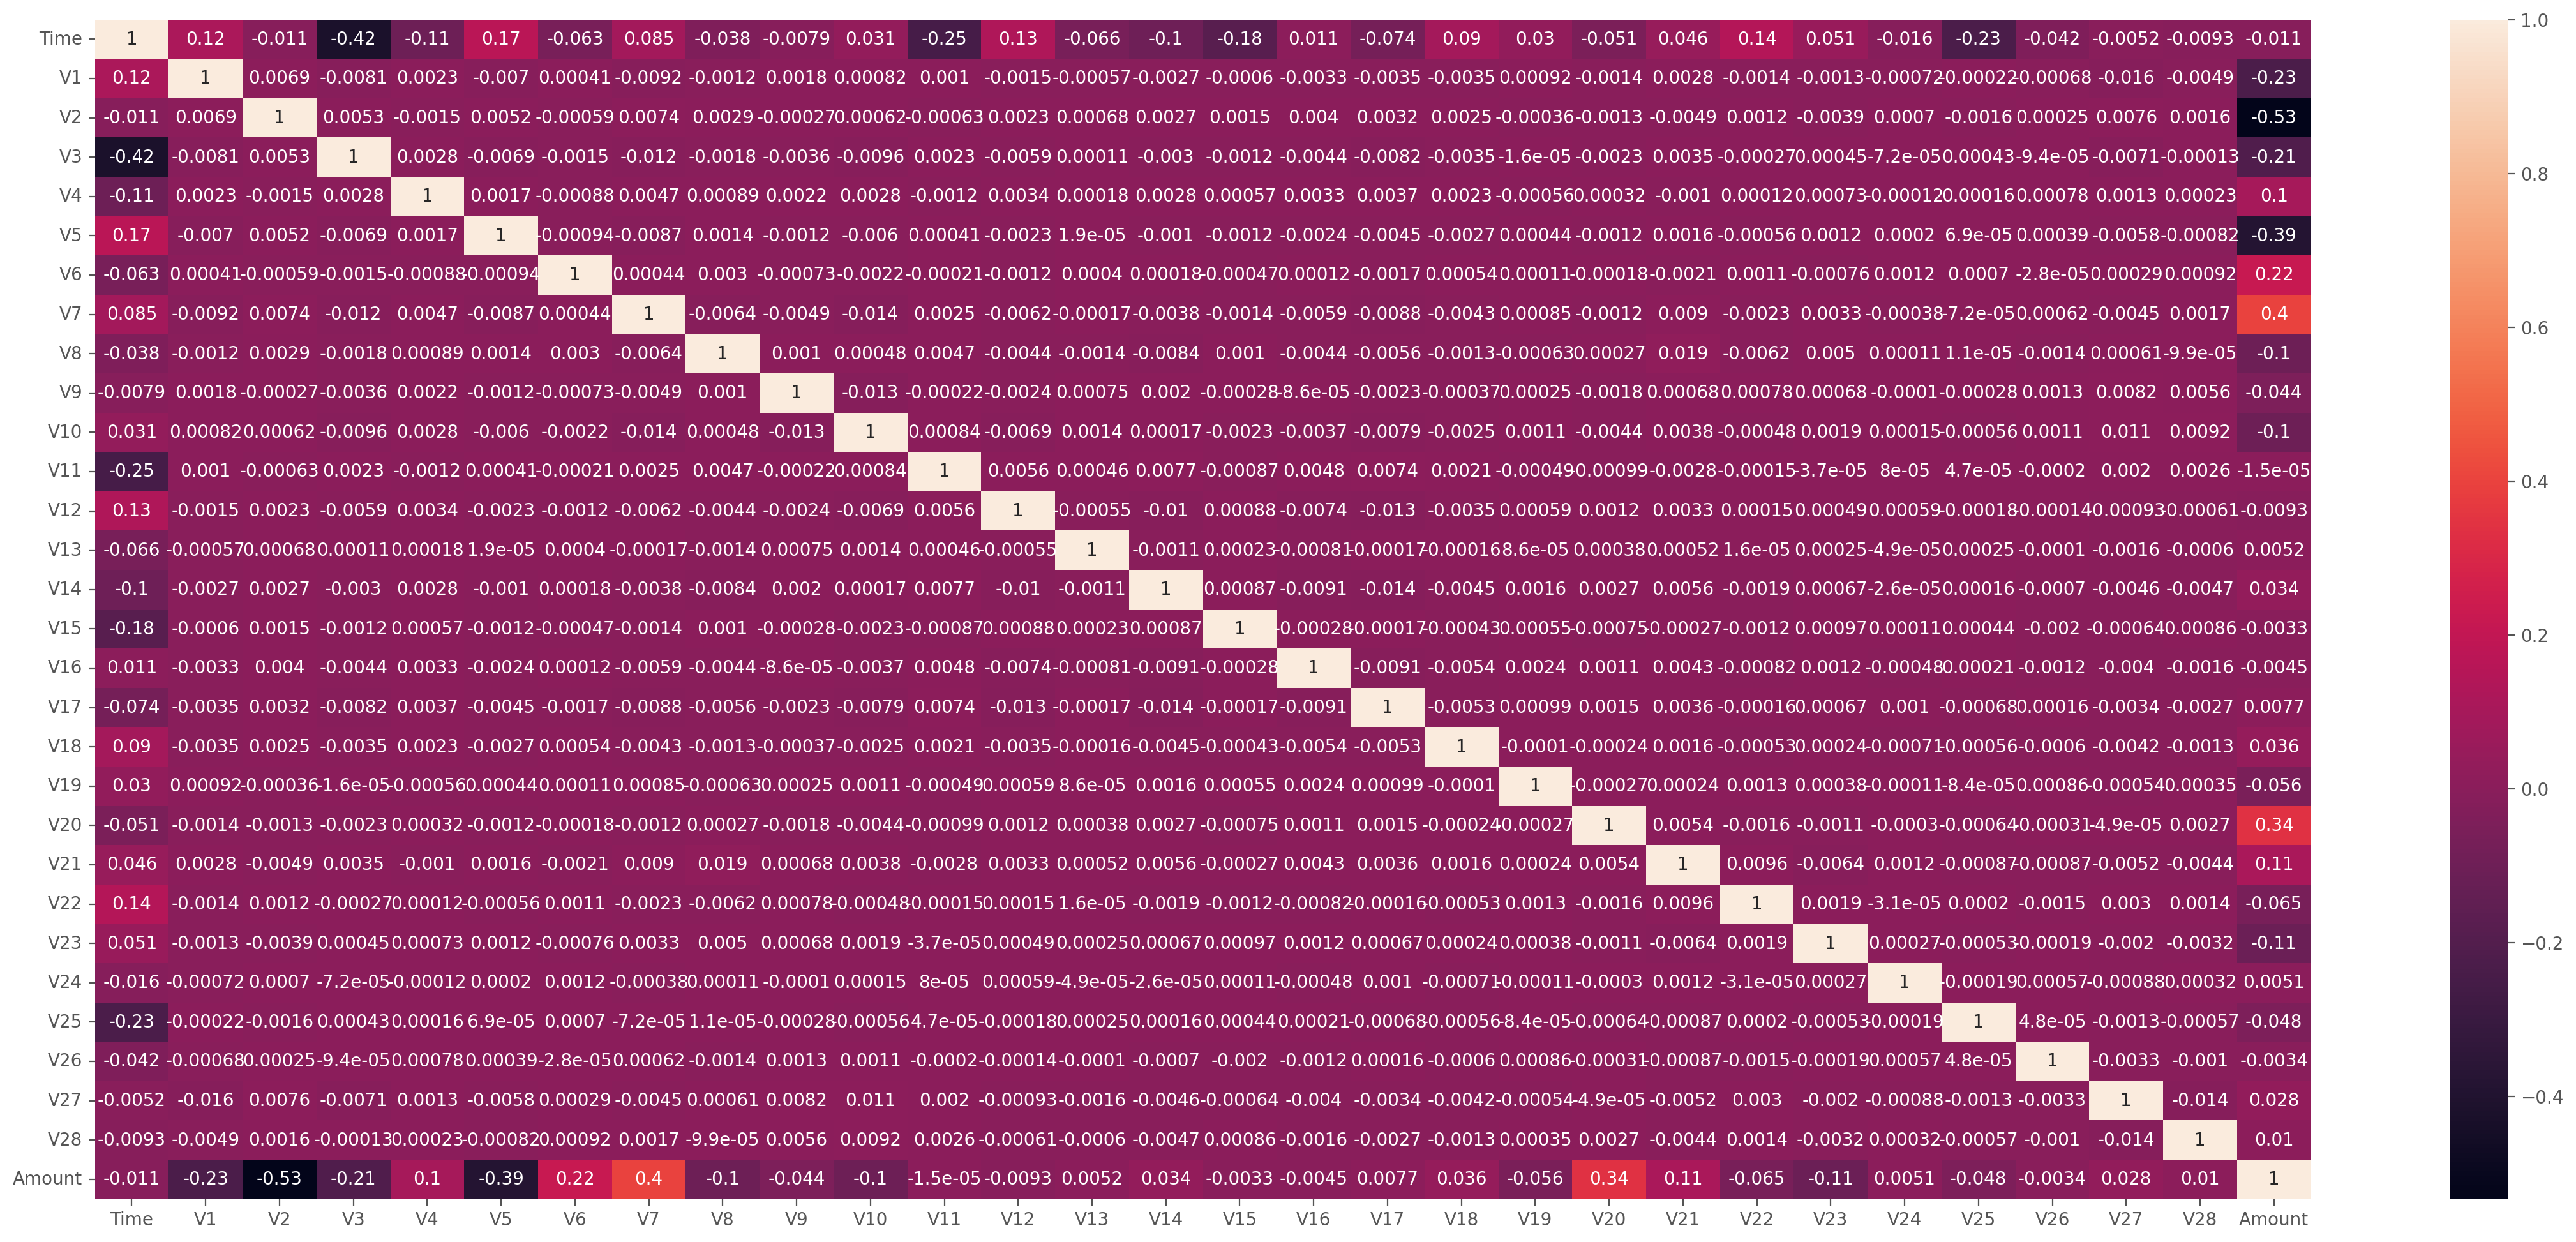

In [117]:
cols = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
plt.figure(figsize = (28,12), dpi = 200)
sns.heatmap(data[cols].corr(), annot = True)

In [118]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [119]:
X = data[cols]
Y = data[['Class']]

In [120]:
print('Independent feature set shape : ', X.shape)
print('Dependent feature shape       : ', Y.shape)

Independent feature set shape :  (283726, 30)
Dependent feature shape       :  (283726, 1)


In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [122]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (226980, 30)
Training labels shape :  (226980, 1)
Testing data shape    :  (56746, 30)
Testing labels shape  :  (56746, 1)


#### Using Logistic Regression -- without dealing with imbalanced classes

In [123]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [124]:
print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(x_test, y_test))

Training Set Accuracy :  0.9990439686315975
Testing Set Accuracy  :  0.9987840552638071


In [125]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss

In [127]:
cm = confusion_matrix(y_test, pred_test)
cm

array([[56619,    42],
       [   27,    58]], dtype=int64)

In [128]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


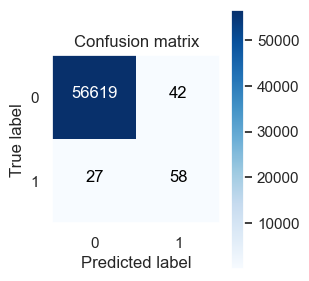

In [129]:
plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

In [130]:
accuracy_score(y_test, pred_test)

0.9987840552638071

In [131]:
precision_score(y_test, pred_test)

0.58

In [132]:
recall_score(y_test, pred_test)

0.6823529411764706

In [133]:
f1_score(y_test, pred_test)

0.6270270270270271

- This is one of the major issues while dealing with unbalanced datasets. 
- Using simpler metrics like accuracy score can be misleading. 
- In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features, and it will have a high accuracy rate, obviously not the correct one.

#### Explain the use of under-sampling and over-sampling for imbalanced classification


Over sampling and under sampling are techniques used in data mining and data analytics to modify unequal data classes to create balanced data sets. Over sampling and under sampling are also known as resampling.
It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).
- The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.
- In under-sampling, the simplest technique involves removing random records from the majority class, which can cause a loss of information.

In [91]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (283253, 31)
class 1: (473, 31)


#### 1. Random Under-Sampling
 - Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

total class of 1 and 0: 0    473
1    473
Name: Class, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

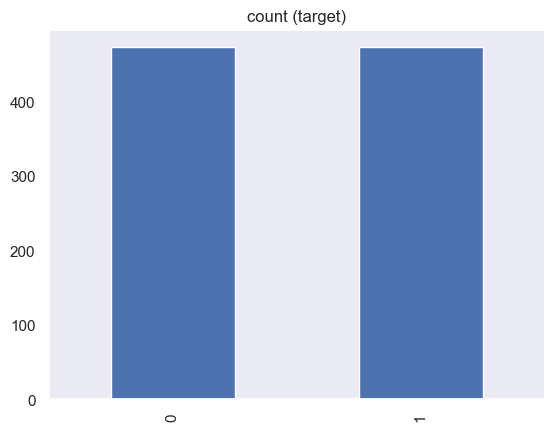

In [145]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_under['Class'].value_counts().plot(kind='bar', title='count (target)')

In [146]:
X = test_under[cols]
Y = test_under[['Class']]

In [147]:
print('Independent feature set shape : ', X.shape)
print('Dependent feature shape       : ', Y.shape)

Independent feature set shape :  (946, 30)
Dependent feature shape       :  (946, 1)


In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [149]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (756, 30)
Training labels shape :  (756, 1)
Testing data shape    :  (190, 30)
Testing labels shape  :  (190, 1)


#### Using Logistic Regression -- with undersampling

In [150]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [151]:
print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(x_test, y_test))

Training Set Accuracy :  0.9166666666666666
Testing Set Accuracy  :  0.9105263157894737


In [152]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss

In [154]:
cm = confusion_matrix(y_test, pred_test)
cm

array([[85,  3],
       [14, 88]], dtype=int64)

In [155]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


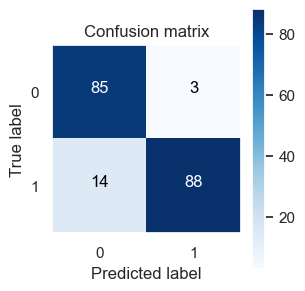

In [156]:
plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

In [157]:
accuracy_score(y_test, pred_test)

0.9105263157894737

In [158]:
precision_score(y_test, pred_test)

0.967032967032967

In [159]:
recall_score(y_test, pred_test)

0.8627450980392157

In [160]:
f1_score(y_test, pred_test)

0.9119170984455958

- F1 score improved with undersampling  

#### 2. Random Over-Sampling
 - Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

In [210]:
X = data[cols]
Y = data[['Class']]

In [211]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, Y)

In [212]:
y_ros.value_counts()

Class
0        283253
1        283253
dtype: int64

In [213]:
Y.value_counts()

Class
0        283253
1           473
dtype: int64

In [218]:
print('Independent feature set shape : ', x_ros.shape)
print('Dependent feature shape       : ', y_ros.shape)

Independent feature set shape :  (566506, 30)
Dependent feature shape       :  (566506, 1)


In [219]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size = 0.2, random_state = 2)

In [220]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (453204, 30)
Training labels shape :  (453204, 1)
Testing data shape    :  (113302, 30)
Testing labels shape  :  (113302, 1)


In [221]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [222]:
print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(x_test, y_test))

Training Set Accuracy :  0.9383986019540869
Testing Set Accuracy  :  0.9380152159714744


In [223]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [224]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss

In [225]:
cm = confusion_matrix(y_test, pred_test)
cm

array([[54351,  2104],
       [ 4919, 51928]], dtype=int64)

In [226]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


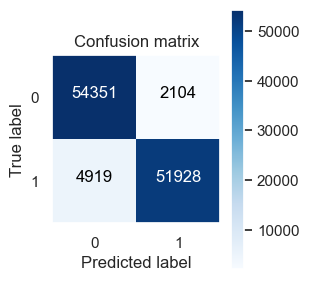

In [227]:
plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0, 1])

In [228]:
accuracy_score(y_test, pred_test)

0.9380152159714744

In [229]:
precision_score(y_test, pred_test)

0.9610601125259106

In [230]:
recall_score(y_test, pred_test)

0.9134694882755466

In [231]:
f1_score(y_test, pred_test)

0.9366606841692294

- F1 score increased with oversampling

#### Using Random forest 

In [232]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rf_classifier.fit(x_train, y_train)

pred_train = rf_classifier.predict(x_train)
pred_test  = rf_classifier.predict(x_test)


In [233]:
from sklearn.metrics import accuracy_score
pred_train = rf_classifier.predict(x_train)
pred_test  = rf_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9944991659385177
Testing Set Accuracy  :  0.994245467864645


In [234]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [235]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56455
           1       0.96      0.91      0.94     56847

    accuracy                           0.94    113302
   macro avg       0.94      0.94      0.94    113302
weighted avg       0.94      0.94      0.94    113302



#### Using boosting (xgboost)

In [236]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier(n_estimators = 50, max_depth = 6)
xg_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [237]:
pred_train = xg_classifier.predict(x_train)
pred_test  = xg_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9999713153458487
Testing Set Accuracy  :  0.9998852623960742


In [238]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [239]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56455
           1       0.96      0.91      0.94     56847

    accuracy                           0.94    113302
   macro avg       0.94      0.94      0.94    113302
weighted avg       0.94      0.94      0.94    113302



## Using hyperparameter tuning

In [246]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [247]:
search_params = {
    'n_estimators' : [10, 20, 30, 40, 50],
    'max_depth'    : [3, 4, 6, 8, 10],
    'max_features' : [4, 5, 6]
}

In [248]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator = classifier,
                                       param_distributions = search_params,
                                       scoring = ['accuracy'],
                                       cv = 5,
                                       refit = 'accuracy',
                                       n_iter = 15,
                                       verbose = 3)

randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END max_depth=6, max_features=4, n_estimators=50; accuracy: (test=0.965) total time=  54.8s
[CV 2/5] END max_depth=6, max_features=4, n_estimators=50; accuracy: (test=0.969) total time=  45.5s
[CV 3/5] END max_depth=6, max_features=4, n_estimators=50; accuracy: (test=0.961) total time=  54.2s
[CV 4/5] END max_depth=6, max_features=4, n_estimators=50; accuracy: (test=0.961) total time=  56.5s
[CV 5/5] END max_depth=6, max_features=4, n_estimators=50; accuracy: (test=0.963) total time=  56.2s
[CV 1/5] END max_depth=10, max_features=4, n_estimators=30; accuracy: (test=0.990) total time=  48.5s
[CV 2/5] END max_depth=10, max_features=4, n_estimators=30; accuracy: (test=0.989) total time=  47.2s
[CV 3/5] END max_depth=10, max_features=4, n_estimators=30; accuracy: (test=0.991) total time=  48.4s
[CV 4/5] END max_depth=10, max_features=4, n_estimators=30; accuracy: (test=0.991) total time=  48.9s
[CV 5/5] END max_depth=10,

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'max_depth': [3, 4, 6, 8, 10],
                                        'max_features': [4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   refit='accuracy', scoring=['accuracy'], verbose=3)

In [255]:
randomized_search.best_params_

{'n_estimators': 30, 'max_features': 5, 'max_depth': 10}

In [256]:
randomized_search.best_score_

0.9943689786812377

In [257]:
best_model = randomized_search.best_estimator_
best_model

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=30)

In [258]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, log_loss

In [259]:
cm = confusion_matrix(y_test, pred_test)

In [260]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56455
           1       0.96      0.91      0.94     56847

    accuracy                           0.94    113302
   macro avg       0.94      0.94      0.94    113302
weighted avg       0.94      0.94      0.94    113302

